In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read CSV
DataSurvey = pd.read_csv("./survey.csv")

In [5]:
#Print dataset
DataSurvey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
#List columns

print(list(DataSurvey.columns))

['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [7]:
#Create a new dataset that contains just "United"

USA_states = DataSurvey[DataSurvey["Country"] == "United States"]

In [8]:
#Print dataset
USA_states.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [9]:
# Dataset that contains States from United States that counts with wellness programs

wellness_program = USA_states[USA_states["wellness_program"] == "Yes"]

wellness_program.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
65,2014-08-27 11:51:07,40,Male,United States,CA,No,Yes,No,Sometimes,More than 1000,...,Don't know,Yes,Maybe,Some of them,No,No,No,No,Yes,NaN
74,2014-08-27 11:56:29,33,Male,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
76,2014-08-27 11:57:33,25,Male,United States,WA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Yes,Yes,Maybe,Yes,Yes,No,NaN


In [10]:
#Group by State
wellness_program_groupby = wellness_program.groupby('state',as_index=False)['wellness_program'].count()
wellness_program_groupby = wellness_program_groupby.sort_values('wellness_program', ascending=False)
wellness_program_groupby = wellness_program_groupby.reset_index(drop=True)
wellness_program_groupby = wellness_program_groupby.head(10)
print(wellness_program_groupby)

  state  wellness_program
0    CA                36
1    WA                28
2    NY                14
3    TN                10
4    IL                 7
5    IN                 6
6    PA                 6
7    OR                 5
8    NC                 4
9    MN                 4


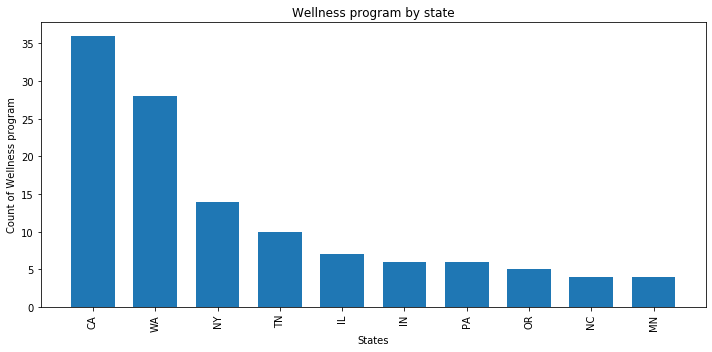

In [11]:
#Bar graph: Top ten of States of United States that have Wellness program
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x=wellness_program_groupby.state, height=wellness_program_groupby.wellness_program, width = 0.7)

plt.title("Wellness program by state")
plt.xticks(rotation= "vertical")
plt.xlabel("States")
plt.ylabel("Count of Wellness program")
plt.tight_layout()